In [66]:
from IPython.display import display, Math, Latex
from ipywidgets import *
import pandas as pd
import math
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy as np

def circleArea(do,di=0):
    return (math.pi/4) * (do**2-di**2)

def cylinderVolume(h,do,di=0):
    return circleArea(do,di) * h

Dc=15
Lc=26
Vc=cylinderVolume(Lc,Dc)
Do=15
do=3.175
Lo=25.4
N=1

Vc

4594.579255875073

In [67]:
Lgo=N*Lo
Vg=cylinderVolume(Lo,Do,do)

Vg

4287.450973049597

In [68]:
Vl=Vg/Vc
Vl

0.9331542094017093

In [69]:
ei=1
ci=1
osi=0
Abeo=N*2*(math.pi/4)*(Do**2 - do**2)
Abeo

337.59456480705495

In [70]:
Abco=N*ci*math.pi*do*Lo
Abco

253.35373954874885

In [71]:
Abso=N*osi*math.pi*do*Lo
Abso

0.0

In [72]:
Abo=Abeo+Abco+Abso
Abo

590.9483043558038

In [73]:
KnMax = 254

#inner diameter over x mm
def do_x(x):
    return ci*2.0*x+do

#outer diameter over x mm
def Do_x(x):
    return Do-osi*2.0*x

#total web over x mm
def Tweb(x):
    return (Do_x(x)-do_x(x))/2.0

def Lgo_x(x):
    return Lgo-2*N*x
    

# find Tweb end point (in mm burned)
x_twebMin=opt.newton(Tweb,0)

In [74]:
# f(x) = ((Lgo-2*N*x) - (2*x+do))/2
def AbTot(x):
    hCol=2*circleArea(Do,do_x(x))
    kCol=math.pi*do_x(x)*Lgo_x(x)
    return hCol+kCol

AbMax = -opt.minimize_scalar(lambda x: -AbTot(x), bounds=[0,x_twebMin], method='bounded').fun

# throat area
Ato = AbMax/KnMax 
# throat diameter
Dto=math.sqrt(4*Ato/math.pi)

print("Ato:" + str(Ato))
print("Dto:" + str(Dto))

Ato:3.074659878021123
Dto:1.978579930987648


<IPython.core.display.Javascript object>


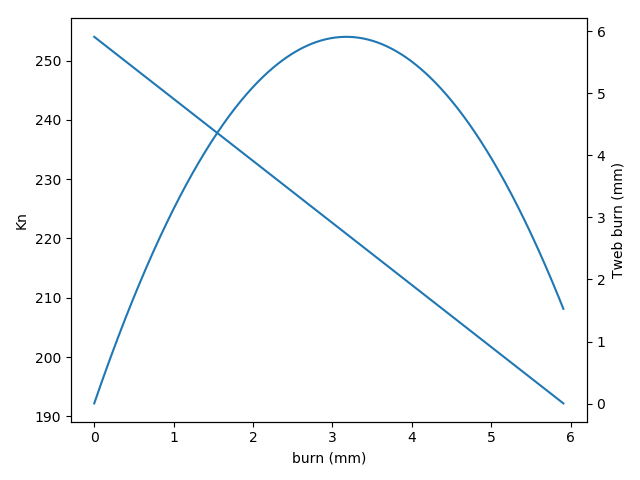

In [75]:
%matplotlib notebook
x = np.arange(0., x_twebMin, .01)
Ab_series = AbTot(x)
Kn_series = Ab_series / Ato
Tweb_series = Tweb(x)

fig, pltKn,  = plt.subplots()
pltKn.plot(x, Kn_series)

pltKn.set_xlabel('burn (mm)')
pltKn.set_ylabel('Kn')
pltTweb = pltKn.twinx()
pltTweb.plot(x, Tweb_series)
pltTweb.set_ylabel('Tweb burn (mm)')

fig.tight_layout()

plt.show()

In [76]:
Rprime=8314.
M=41.98 # lookup
R=198.
k=1.139
To=1720.
Patm=.101

display(Math('\\sqrt{\\frac{k}{R T_o}}\\left(\\frac{2}{k+1}\\right)^{\\frac{k+1}{2(k-1)}}'))

mnfconst=math.sqrt(k/(To*R))*((2/(k+1))**((k+1)/((2*(k-1)))))


<IPython.core.display.Math object>

In [77]:


kv=0
rhopgrain=1.795

x = np.arange(0., x_twebMin, .0071)

data = {"xi":x.tolist()}
pData = pd.DataFrame.from_dict(data)
pData['tweb']=Tweb(pData['xi'])
pData['d']=do_x(pData['xi'])
pData['D']=Do_x(pData['xi'])
pData['L']=Lgo_x(pData['xi'])
pData['At']=Ato
pData['A*']=Ato/(1000**2)
pData['Aduct']=circleArea(pData['D'])-circleArea(pData['D'],pData['d'])
pData['Aduct/At']=pData['Aduct']/pData['At']
pData['G']=6-pData['Aduct/At']
pData['Po']=.101 # placeholder - compute later
pData['a']=8.26 # lookup later
pData['n']=.319 # lookup later
pData['r']=(1+kv*pData['G'])*pData['a']*pData['Po']**pData['n']
pData['t']=pData['xi']/pData['r']
pData['Vgrain_mm']=cylinderVolume(pData['L'],pData['D'],pData['d'])
pData['Vgrain_m']=pData['Vgrain_mm']/1000**3
pData['Vfree']=(Vc/1000**3)-pData['Vgrain_m']
pData['Mgrain']=rhopgrain*pData['Vgrain_mm']/1000**2
pData['Mgen']=pd.DataFrame.diff(pData['Mgrain'])/pd.DataFrame.diff(pData['t'])
pData['mnfconst']=(pData['Po']-Patm)*1000000*pData['A*']*mnfconst




#pData['Mnoz']=pd.DataFrame.diff(pData['Mgrain'])/pd.DataFrame.diff(pData['t'])
#pData['Msto']=pd.DataFrame.diff(pData['Mgrain'])/pd.DataFrame.diff(pData['t'])



pData


,xi,tweb,d,D,L,At,A*,Aduct,Aduct/At,G,...,a,n,r,t,Vgrain_mm,Vgrain_m,Vfree,Mgrain,Mgen,mnfconst
0,0.0000,5.9125,3.1750,15.0,25.4000,3.07466,0.000003,7.917304,2.575018,3.424982,...,8.26,0.319,3.975196,0.000000,4287.450973,4.287451e-06,3.071283e-07,0.007696,NaN,0.0
1,0.0071,5.9054,3.1892,15.0,25.3858,3.07466,0.000003,7.988282,2.598103,3.401897,...,8.26,0.319,3.975196,0.001786,4283.252225,4.283252e-06,3.113270e-07,0.007688,-0.004220,0.0
2,0.0142,5.8983,3.2034,15.0,25.3716,3.07466,0.000003,8.059577,2.621290,3.378710,...,8.26,0.319,3.975196,0.003572,4279.047458,4.279047e-06,3.155318e-07,0.007681,-0.004226,0.0
3,0.0213,5.8912,3.2176,15.0,25.3574,3.07466,0.000003,8.131188,2.644581,3.355419,...,8.26,0.319,3.975196,0.005358,4274.836683,4.274837e-06,3.197426e-07,0.007673,-0.004232,0.0
4,0.0284,5.8841,3.2318,15.0,25.3432,3.07466,0.000003,8.203116,2.667975,3.332025,...,8.26,0.319,3.975196,0.007144,4270.619915,4.270620e-06,3.239593e-07,0.007666,-0.004238,0.0
5,0.0355,5.8770,3.2460,15.0,25.3290,3.07466,0.000003,8.275360,2.691472,3.308528,...,8.26,0.319,3.975196,0.008930,4266.397167,4.266397e-06,3.281821e-07,0.007658,-0.004244,0.0
6,0.0426,5.8699,3.2602,15.0,25.3148,3.07466,0.000003,8.347922,2.715072,3.284928,...,8.26,0.319,3.975196,0.010716,4262.168452,4.262168e-06,3.324108e-07,0.007651,-0.004250,0.0
7,0.0497,5.8628,3.2744,15.0,25.3006,3.07466,0.000003,8.420800,2.738774,3.261226,...,8.26,0.319,3.975196,0.012503,4257.933785,4.257934e-06,3.366455e-07,0.007643,-0.004256,0.0
8,0.0568,5.8557,3.2886,15.0,25.2864,3.07466,0.000003,8.493995,2.762580,3.237420,...,8.26,0.319,3.975196,0.014289,4253.693179,4.253693e-06,3.408861e-07,0.007635,-0.004262,0.0
9,0.0639,5.8486,3.3028,15.0,25.2722,3.07466,0.000003,8.567506,2.786489,3.213511,...,8.26,0.319,3.975196,0.016075,4249.446647,4.249447e-06,3.451326e-07,0.007628,-0.004268,0.0
